In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | belyy yar
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | viedma
Processing Record 5 of Set 1 | hobyo
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | charters towers
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | stromness
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kyabram
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | izvoarele sucevei
Processing Record 19 of Set 1 | tevaitoa
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | vestmannaeyjar
Processing Recor

Processing Record 37 of Set 4 | pontianak
Processing Record 38 of Set 4 | alofi
Processing Record 39 of Set 4 | vardo
Processing Record 40 of Set 4 | palencia
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | lensk
Processing Record 43 of Set 4 | laela
Processing Record 44 of Set 4 | pascagoula
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | toora-khem
Processing Record 47 of Set 4 | nichinan
Processing Record 48 of Set 4 | cabot
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | praia
Processing Record 1 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 5 | yar
Processing Record 3 of Set 5 | bathsheba
Processing Record 4 of Set 5 | rio cuarto
Processing Record 5 of Set 5 | thohoyandou
Processing Record 6 of Set 5 | ulaangom
Processing Record 7 of Set 5 | khatanga
Processing Record 8 of Set 5 | axim
Processing Record 9 of Set 5 | buchanan
Processing Record 10 of 

Processing Record 27 of Set 8 | sorong
Processing Record 28 of Set 8 | saint george
Processing Record 29 of Set 8 | hithadhoo
Processing Record 30 of Set 8 | port hardy
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | dolgorukovo
Processing Record 33 of Set 8 | shenjiamen
Processing Record 34 of Set 8 | bulgan
Processing Record 35 of Set 8 | trinidad
Processing Record 36 of Set 8 | sampit
Processing Record 37 of Set 8 | lysyanka
Processing Record 38 of Set 8 | nipawin
Processing Record 39 of Set 8 | russell
Processing Record 40 of Set 8 | princeton
Processing Record 41 of Set 8 | anchorage
Processing Record 42 of Set 8 | hvide sande
Processing Record 43 of Set 8 | nanortalik
Processing Record 44 of Set 8 | lorengau
Processing Record 45 of Set 8 | havoysund
Processing Record 46 of Set 8 | corinth
Processing Record 47 of Set 8 | qaqortoq
Processing Record 48 of Set 8 | hatsukaichi
Processing Record 49 of Set 8 | airai
Processing Record 50 of Set 8 | karasjok
Proce

Processing Record 14 of Set 12 | staunton
Processing Record 15 of Set 12 | ayorou
Processing Record 16 of Set 12 | kodinar
Processing Record 17 of Set 12 | odweyne
Processing Record 18 of Set 12 | jilin
Processing Record 19 of Set 12 | rocha
Processing Record 20 of Set 12 | ballachulish
Processing Record 21 of Set 12 | aizpute
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | torrington
Processing Record 24 of Set 12 | trairi
Processing Record 25 of Set 12 | katsina
Processing Record 26 of Set 12 | stephenville
Processing Record 27 of Set 12 | grand baie
Processing Record 28 of Set 12 | kongolo
Processing Record 29 of Set 12 | ust-omchug
Processing Record 30 of Set 12 | te anau
Processing Record 31 of Set 12 | port hawkesbury
Processing Record 32 of Set 12 | nova zagora
Processing Record 33 of Set 12 | sao joao da barra
Processing Record 34 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 35 of Set 12 | beitbridge
Processing Record 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,26.49,88,100,11.45,GL,2021-09-30 21:05:43
1,Belyy Yar,53.6039,91.3903,44.49,93,40,6.71,RU,2021-09-30 21:05:44
2,Klaksvik,62.2266,-6.5890,52.72,92,99,23.71,FO,2021-09-30 21:05:44
3,Viedma,-40.8135,-62.9967,67.98,19,3,12.55,AR,2021-09-30 21:05:44
4,Hobyo,5.3505,48.5268,78.13,89,98,20.76,SO,2021-09-30 21:05:45
5,Mar Del Plata,-38.0023,-57.5575,61.00,46,100,8.99,AR,2021-09-30 21:04:47
6,Punta Arenas,-53.1500,-70.9167,44.11,52,94,19.91,CL,2021-09-30 21:05:45
7,Charters Towers,-20.1000,146.2667,67.39,87,91,9.31,AU,2021-09-30 21:05:45
8,Tasiilaq,65.6145,-37.6368,35.76,82,2,7.20,GL,2021-09-30 21:03:15
9,Stromness,58.9650,-3.2960,53.56,84,39,10.00,GB,2021-09-30 21:05:46


In [20]:
# Reorder the columns in the data
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [22]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-09-30 21:05:43,77.4840,-69.3632,26.49,88,100,11.45
1,Belyy Yar,RU,2021-09-30 21:05:44,53.6039,91.3903,44.49,93,40,6.71
2,Klaksvik,FO,2021-09-30 21:05:44,62.2266,-6.5890,52.72,92,99,23.71
3,Viedma,AR,2021-09-30 21:05:44,-40.8135,-62.9967,67.98,19,3,12.55
4,Hobyo,SO,2021-09-30 21:05:45,5.3505,48.5268,78.13,89,98,20.76
...,...,...,...,...,...,...,...,...,...
581,Monrovia,LR,2021-09-30 21:05:38,6.3005,-10.7969,78.57,85,99,7.25
582,Pandan,PH,2021-09-30 21:08:45,14.0453,124.1694,79.95,82,90,3.74
583,Tecoanapa,MX,2021-09-30 21:04:13,16.5167,-98.7500,84.60,70,15,8.34
584,Faya,SA,2021-09-30 21:08:46,18.3851,42.4509,64.92,34,87,5.19


In [28]:
# Create the output file (CSV).
output_data_file = "C:/Users/dtj13/Documents/Data Analytics Course/Module_6_API/World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

1633107807.769002

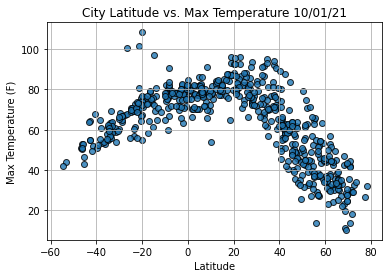

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:/Users/dtj13/Documents/Data Analytics Course/Module_6_API/World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

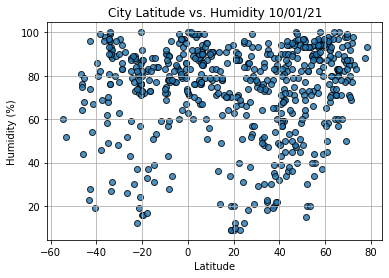

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/dtj13/Documents/Data Analytics Course/Module_6_API/World_Weather_Analysis/Fig2.png")
# Show plot.
plt.show()

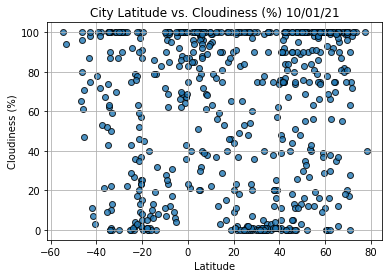

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/dtj13/Documents/Data Analytics Course/Module_6_API/World_Weather_Analysis/Fig3.png")
# Show plot.
plt.show()

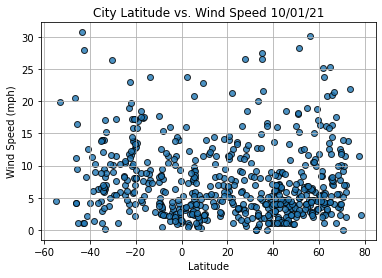

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:/Users/dtj13/Documents/Data Analytics Course/Module_6_API/World_Weather_Analysis/Fig4.png")
# Show plot.
plt.show()